# Introduction

This goal of this project is to analyze biodiversity data from the National Parks Service, particularly around various species observed in different national park locations.

This project will scope, analyze, prepare, plot data, and seek to explain the findings from the analysis.

Here are a few questions that this project has sought to answer:

- In which park were most observations made?
- Are certain types of species more likely to be endangered?
- How many species are protected?
- Are the differences between species and their conservation status significant?
- Which species is most prevalent and which is least prevalent?

**Data sources:**

Both `Observations.csv` and `Species_info.csv` was provided by [Codecademy.com](https://www.codecademy.com).

Note: The data for this project is *inspired* by real data, but is mostly fictional.

# Scoping

Four sections were created below to help guide the project's process and progress. The first section is the project goals, this section will define the high-level objectives and set the intentions for this project. The next section is the data, which is already provided. Thirdly, the analysis includes the methods and questions that are aligned with the project goals. Lastly, evaluation will build conclusions and findings from the analysis.

## Project goals

In this project the perspective will be through a biodiversity analyst for the National Parks Service. The National Park Service wants to ensure the survival of at-risk species, to maintain the level of biodiversity within their parks. Therefore, the main objectives as an analyst will be understanding characteristics about the species and their conservations status, and those species and their relationship to the national parks. Some questions that are posed:

- In which park were most observations made?
- Are certain types of species more likely to be endangered?
- How many species are protected?
- Are the differences between species and their conservation status significant?
- Which species is most prevalent and which is least prevalent?

### Data

This project has two data sets that came with the package. The first `csv` file has information about each species and another has observations of species with park locations. This data will be prepared and used to analyze the goals of the project. 

### Analysis

In this section, descriptive statistics and data visualization techniques will be employed to understand the data better. Statistical inference will also be used to test if the observed values are statistically significant. Some of the key metrics that will be computed include: 

1. Distributions
1. counts
1. relationship between species
1. conservation status of species
1. observations of species in parks. 

### Evaluation

This section revisits the goals and checks if the output of the analysis corresponds to the questions first set to be answered. This section will also reflect on what has been learned through the process, and if any of the questions were unable to be answered. This also includes limitations or if any of the analysis could have been done using different methodologies.


# Preparing the Data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
species = pd.read_csv('species_info.csv')
observ = pd.read_csv('observations.csv')

## Species table

In [3]:
species.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


In [4]:
species.columns

Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object')

In [5]:
species = species.rename(columns={'category':'Category', 'scientific_name':'Scientific Name', 'common_names':'Common Name', 'conservation_status':'Conservation Status'})

In [6]:
species.duplicated().value_counts()

False    5824
dtype: int64

In [7]:
species = species.fillna(value={'Conservation Status': 'No Status'})

In [8]:
species.head()

,Category,Scientific Name,Common Name,Conservation Status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status
1,Mammal,Bos bison,"American Bison, Bison",No Status
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Status
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Status


In [9]:
species.describe()

,Category,Scientific Name,Common Name,Conservation Status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Holcus lanatus,Dicranum Moss,No Status
freq,4470,3,7,5633


## Observations table

In [10]:
observ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


In [11]:
observ.columns

Index(['scientific_name', 'park_name', 'observations'], dtype='object')

In [12]:
observ = observ.rename(columns={'scientific_name':'Scientific Name', 'park_name':'National Park', 'observations':'Observations'})

In [13]:
observ['National Park'] = observ['National Park'].replace(' [N][a][t][i][o][n][a][l] [P][a][r][k]', '', regex=True)
observ.head()

,Scientific Name,National Park,Observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [14]:
observ.head()

,Scientific Name,National Park,Observations
0,Vicia benghalensis,Great Smoky Mountains,68
1,Neovison vison,Great Smoky Mountains,77
2,Prunus subcordata,Yosemite,138
3,Abutilon theophrasti,Bryce,84
4,Githopsis specularioides,Great Smoky Mountains,85


In [15]:
observ.duplicated().value_counts()

False    23281
True        15
dtype: int64

In [16]:
observ = observ.drop_duplicates()

In [17]:
observ.describe()

,Observations
count,23281.000000
mean,142.280357
std,69.885439
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [18]:
observ['National Park'].value_counts()

Bryce                    5823
Yosemite                 5821
Yellowstone              5819
Great Smoky Mountains    5818
Name: National Park, dtype: int64

# Analysis

In [20]:
species_prot = species
species_prot['is protected'] = species_prot['Conservation Status'] != 'No Status'
species_prot.head()

,Category,Scientific Name,Common Name,Conservation Status,is protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Status,False
1,Mammal,Bos bison,"American Bison, Bison",No Status,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Status,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Status,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Status,False


In [21]:
category_counts = species_prot.groupby(['Category', 'is protected'])\
                        ['Scientific Name'].nunique()\
                        .reset_index()\
                        .pivot(columns='is protected',
                                      index='Category',
                                      values='Scientific Name')\
                        .reset_index()
category_counts.columns = ['Category', 'not protected', 'protected']
category_counts

,Category,not protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [31]:
category_counts['Percent protected'] = category_counts['protected'] / \
                                      (category_counts['protected'] + category_counts['not protected']) * 100

category_counts

,Category,not protected,protected,Percent protected
0,Amphibian,72,7,8.860759
1,Bird,413,75,15.368852
2,Fish,115,11,8.730159
3,Mammal,146,30,17.045455
4,Nonvascular Plant,328,5,1.501502
5,Reptile,73,5,6.410256
6,Vascular Plant,4216,46,1.079305


### Statistical Significance

This section will run some chi-squared tests to see if different species have statistically significant differences in conservation status rates.

The first test will be run to find out if there is a significant relationship between the conservation status rates of mammals and birds. 

In [32]:
from scipy.stats import chi2_contingency

contingency1 = [[30, 146],
              [75, 413]]
chi2_contingency(contingency1) 

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

The p-value of 0.69, retrieved from this test, is much larger than the standard threshold of 0.05. In the case of mammals and birds there doesn't seem to be any significant relationship between them which means that the variables are independent.

The next pair, is going to test the difference between reptiles and mammals.

In [34]:
contingency2 = [[30, 146],
               [5, 73]]
chi2_contingency(contingency2)

(4.289183096203645,
 0.03835559022969898,
 1,
 array([[ 24.2519685, 151.7480315],
        [ 10.7480315,  67.2519685]]))

This time the p-value is 0.039 which is below the standard threshold of 0.05 which can be take that the difference between reptile and mammal is statistically significant. Mammals are shown to have a statistically significant higher rate of needed protection compared with reptiles.

## In which park were most observations made?

In [60]:
grouped = observ.groupby(['Scientific Name', 'National Park'])['Observations'].sum().reset_index()
grouped.head()

,Scientific Name,National Park,Observations
0,Abies bifolia,Bryce,109
1,Abies bifolia,Great Smoky Mountains,72
2,Abies bifolia,Yellowstone,215
3,Abies bifolia,Yosemite,136
4,Abies concolor,Bryce,83


In [61]:
std_bryce = grouped[grouped['National Park']=='Bryce']['Observations'].std()
std_gsm = grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'].std()
std_yellowstone = grouped[grouped['National Park']=='Yellowstone']['Observations'].std()
std_yosemite = grouped[grouped['National Park']=='Yosemite']['Observations'].std()
print("Standard deviation of observations in Bryce:", std_bryce)
print("Standard deviation of observations in Great Smoky Mountains:", std_gsm)
print("Standard deviation of observations in Yellowstone:", std_yellowstone)
print("Standard deviation of observations in Yosemite:", std_yosemite)

Standard deviation of observations in Bryce: 30.660194267232303
Standard deviation of observations in Great Smoky Mountains: 26.600462286851588
Standard deviation of observations in Yellowstone: 60.21166077616262
Standard deviation of observations in Yosemite: 39.756212877088885


In [62]:
median_bryce = grouped[grouped['National Park']=='Bryce']['Observations'].median()
median_gsm = grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'].median()
median_yellowstone = grouped[grouped['National Park']=='Yellowstone']['Observations'].median()
median_yosemite = grouped[grouped['National Park']=='Yosemite']['Observations'].median()
print("Median of observations in Bryce:", median_bryce)
print("Median of observations in Great Smoky Mountains:", median_gsm)
print("Median of observations in Yellowstone:", median_yellowstone)
print("Median of observations in Yosemite:", median_yosemite)

Median of observations in Bryce: 100.0
Median of observations in Great Smoky Mountains: 75.0
Median of observations in Yellowstone: 250.0
Median of observations in Yosemite: 150.0


In [63]:
mean_bryce = grouped[grouped['National Park']=='Bryce']['Observations'].mean()
mean_gsm = grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'].mean()
mean_yellowstone = grouped[grouped['National Park']=='Yellowstone']['Observations'].mean()
mean_yosemite = grouped[grouped['National Park']=='Yosemite']['Observations'].mean()
print("Mean of observations in Bryce:", mean_bryce)
print("Mean of observations in Great Smoky Mountains:", mean_gsm)
print("Mean of observations in Yellowstone:", mean_yellowstone)
print("Mean of observations in Yosemite:", mean_yosemite)

Mean of observations in Bryce: 103.9344883595019
Mean of observations in Great Smoky Mountains: 77.85201227215305
Mean of observations in Yellowstone: 260.2985020754376
Mean of observations in Yosemite: 155.7184623714131


In [64]:
max_bryce = grouped[grouped['National Park']=='Bryce']['Observations'].max()
max_gsm = grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'].max()
max_yellowstone = grouped[grouped['National Park']=='Yellowstone']['Observations'].max()
max_yosemite = grouped[grouped['National Park']=='Yosemite']['Observations'].max()
print("Maximum of observations in Bryce:", max_bryce)
print("Maximum of observations in Great Smoky Mountains:", max_gsm)
print("Maximum of observations in Yellowstone:", max_yellowstone)
print("Maximum of observations in Yosemite:", max_yosemite)

Maximum of observations in Bryce: 339
Maximum of observations in Great Smoky Mountains: 256
Maximum of observations in Yellowstone: 805
Maximum of observations in Yosemite: 505


In [65]:
min_bryce = grouped[grouped['National Park']=='Bryce']['Observations'].min()
min_gsm = grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'].min()
min_yellowstone = grouped[grouped['National Park']=='Yellowstone']['Observations'].min()
min_yosemite = grouped[grouped['National Park']=='Yosemite']['Observations'].min()
print("Minimum of observations in Bryce:", min_bryce)
print("Minimum of observations in Great Smoky Mountains:", min_gsm)
print("Minimum of observations in Yellowstone:", min_yellowstone)
print("Minimum of observations in Yosemite:", min_yosemite)

Minimum of observations in Bryce: 9
Minimum of observations in Great Smoky Mountains: 10
Minimum of observations in Yellowstone: 57
Minimum of observations in Yosemite: 31


In [66]:
range_bryce = max_bryce - min_bryce
range_gsm = max_gsm - min_gsm
range_yellowstone = max_yellowstone - min_yellowstone
range_yosemite = max_yosemite - min_yosemite
range_bryce, range_gsm, range_yellowstone, range_yosemite
print("Range of observations in Bryce:", range_bryce)
print("Range of observations in Great Smoky Mountains:", range_gsm)
print("Range of observations in Yellowstone:", range_yellowstone)
print("Range of observations in Yosemite:", range_yosemite)

Range of observations in Bryce: 330
Range of observations in Great Smoky Mountains: 246
Range of observations in Yellowstone: 748
Range of observations in Yosemite: 474


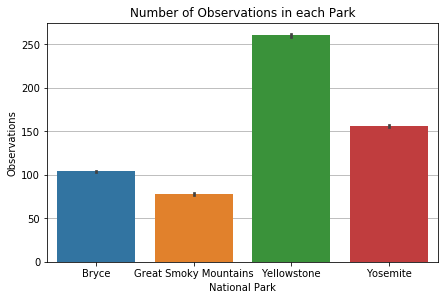

In [67]:
plt.figure(figsize=(7, 4.4))
plt.title('Number of Observations in each Park')
plt.grid(True, zorder=1)
sns.barplot(data=grouped, x='National Park', y='Observations', zorder=2);

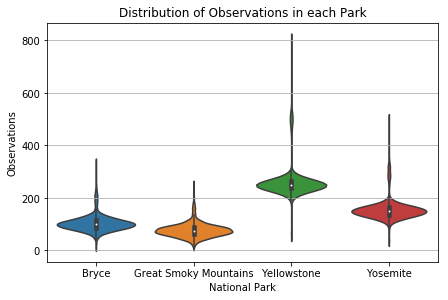

In [68]:
plt.figure(figsize=(7, 4.4))
plt.title('Distribution of Observations in each Park')
plt.grid(True, zorder=1)
sns.violinplot(data=grouped, x='National Park', y='Observations', zorder=2);

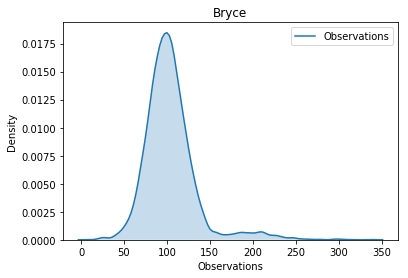

In [69]:
sns.kdeplot(grouped[grouped['National Park']=='Bryce']['Observations'], shade=True, color=sns.color_palette()[0])
plt.title('Bryce')
plt.xlabel('Observations')
plt.ylabel('Density');

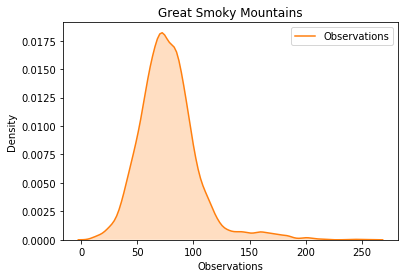

In [70]:
sns.kdeplot(grouped[grouped['National Park']=='Great Smoky Mountains']['Observations'], shade=True, color=sns.color_palette()[1])
plt.title('Great Smoky Mountains')
plt.xlabel('Observations')
plt.ylabel('Density');

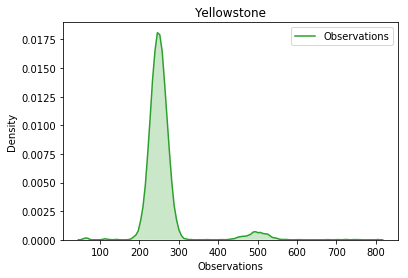

In [71]:
sns.kdeplot(grouped[grouped['National Park']=='Yellowstone']['Observations'], shade=True, color=sns.color_palette()[2])
plt.title('Yellowstone')
plt.xlabel('Observations')
plt.ylabel('Density');

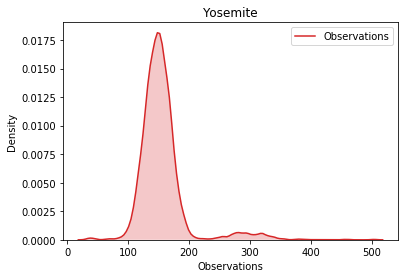

In [72]:
sns.kdeplot(grouped[grouped['National Park']=='Yosemite']['Observations'], shade=True, color=sns.color_palette()[3])
plt.title('Yosemite')
plt.xlabel('Observations')
plt.ylabel('Density');

The number of observations in the four parks are aproximately normally distributed. Most observations were made in Yellowstone National Park with an average of 256. The data of the National Parks Bryce, Yellowstone and Yosemite have a right skew. 
The range of observations of 748 is highest in Yellowstone. In Yellowstone the species "Holcus Ianatus" was observed the most often with 805 times.

## Are certain types of species more likely to be endangered?

In [73]:
cat_status = species.groupby(['Category', 'Conservation Status'])['Scientific Name'].count().reset_index()
cat_status = cat_status.rename(columns={'Scientific Name': 'Number of Species'})

In [74]:
total_num_species = species['Scientific Name'].count()
spec_counts = species['Category'].value_counts()
spec_counts

Vascular Plant       4470
Bird                  521
Nonvascular Plant     333
Mammal                214
Fish                  127
Amphibian              80
Reptile                79
Name: Category, dtype: int64

In [75]:
def calc_percentage(cat, number):
    if cat == 'Vascular Plant':
        return number / spec_counts[0] * 100
    elif cat == 'Bird':
        return number / spec_counts[1] * 100
    elif cat == 'Nonvascular Plant':
        return number / spec_counts[2] * 100
    elif cat == 'Mammal':
        return number / spec_counts[3] * 100
    elif cat == 'Fish':
        return number / spec_counts[4] * 100
    elif cat == 'Amphibian':
        return number / spec_counts[5] * 100
    elif cat == 'Reptile':
        return number / spec_counts[6] * 100

In [76]:
cat_status['Percentage / %'] = cat_status[['Category', 'Number of Species']].apply(lambda x: calc_percentage(*x), axis=1)
cat_status['Total Percentage / %'] = cat_status['Number of Species'].apply(lambda x: x / total_num_species * 100)

In [77]:
cat_status = cat_status.replace('No Status', np.nan)

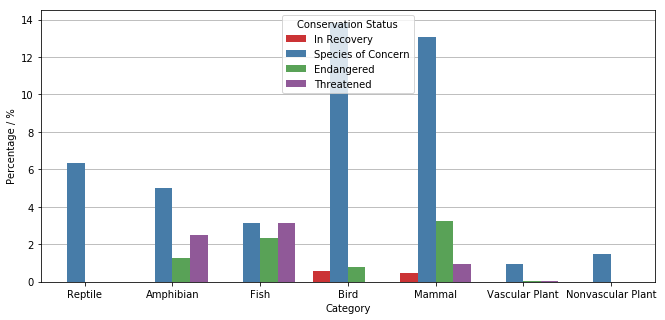

In [78]:
plt.figure(figsize=(11, 5))
plt.grid(True, zorder=1)
sns.barplot(data=cat_status, x='Category', y='Percentage / %', hue='Conservation Status', order=['Reptile', 'Amphibian', 'Fish', 'Bird', 'Mammal', 'Vascular Plant', 'Nonvascular Plant'], hue_order=['In Recovery', 'Species of Concern', 'Endangered', 'Threatened'], zorder=2, palette="Set1");

0.57 % of birds and 0.47 % of mammals are in recovery.
All seven categories have species in concern. 6.33 % of reptiles 5.00 % of amphibians, 3.15 % of fishes, 13.82 % birds, 13.08 % of mammals, 0.96 % of vascular plants and 1.50 % of nonvascular plants are in concern.
1.25 % of amphibians, 2.36 % of fishes, 0.78 % of birds, 3.27 % of mammals and 0.02 % of vascular plants are endangered.
2.50 % of amphibians, 3.15 % of fishes and 0.93 % of mammals are threatened. 
The mammals have the most species that are either endangered, threatened or species in concern.

In [84]:
cat_status = cat_status.dropna(subset=['Conservation Status'])
pivot2 = cat_status.pivot(index='Conservation Status', columns='Category', values='Percentage / %')
pivot2

Category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
Conservation Status,,,,,,,
Endangered,1.25,0.767754,2.362205,3.271028,NaN,NaN,0.022371
In Recovery,NaN,0.575816,NaN,0.467290,NaN,NaN,NaN
Species of Concern,5.00,13.819578,3.149606,13.084112,1.501502,6.329114,0.961969
Threatened,2.50,NaN,3.149606,0.934579,NaN,NaN,0.044743


In [85]:
sum_percentage = cat_status.groupby('Category')['Percentage / %'].sum().reset_index()
sum_percentage

,Category,Percentage / %
0,Amphibian,8.750000
1,Bird,15.163148
2,Fish,8.661417
3,Mammal,17.757009
4,Nonvascular Plant,1.501502
5,Reptile,6.329114
6,Vascular Plant,1.029083


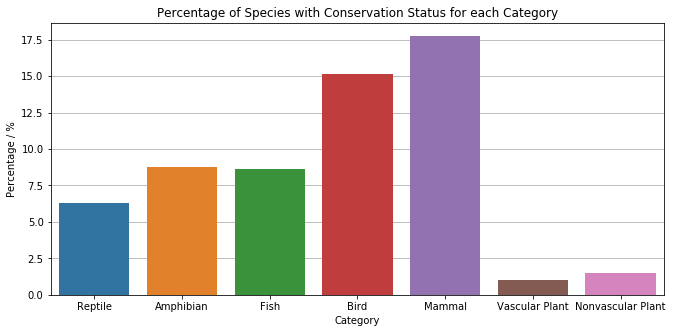

In [86]:
plt.figure(figsize=(11, 5))
plt.title('Percentage of Species with Conservation Status for each Category')
plt.grid(True, zorder=1)
sns.barplot(data=sum_percentage, x='Category', y='Percentage / %', order=['Reptile', 'Amphibian', 'Fish', 'Bird', 'Mammal', 'Vascular Plant', 'Nonvascular Plant'], zorder=2);

Considering the percentage of species with Conservation Status the mammals and birds protrude.
The mammals have the highest percentage of 17.76 %, followed by the birds of 15.16 %. The amphibians and fishes have a similar fraction of 8.75 % and 8.66 %, respectively. From animals, reptiles have the smallest percentage of species with conservation status (6.33 %). Only few plants are endangered or threatened. The percentages for vascular and nonvascular plants equal 1.03 % and 1.50 %, respectively.  

## How many species are protected?

In [90]:
status = species.groupby('Conservation Status').count()['Category'].reset_index().rename(columns={'Category': 'Number of Species'}).drop(2)
status

,Conservation Status,Number of Species
0,Endangered,16
1,In Recovery,4
3,Species of Concern,161
4,Threatened,10


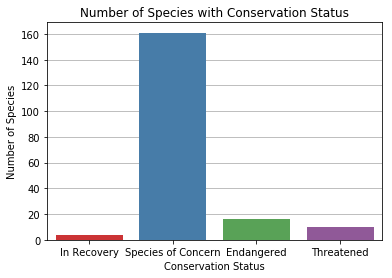

In [96]:
plt.title('Number of Species with Conservation Status')
plt.grid(True, zorder=1)
sns.barplot(data=status, x='Conservation Status', y='Number of Species', order=['In Recovery', 'Species of Concern', 'Endangered', 'Threatened'], zorder=2, palette="Set1");

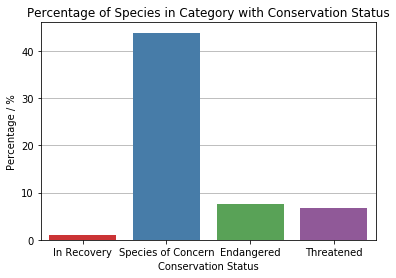

In [98]:
plt.title('Percentage of Species in Category with Conservation Status')
plt.grid(True, zorder=1)
sns.barplot(data=cat_status, x='Conservation Status', y='Percentage / %', estimator=np.sum, ci=None, order=['In Recovery', 'Species of Concern', 'Endangered', 'Threatened'], zorder=2, palette="Set1");

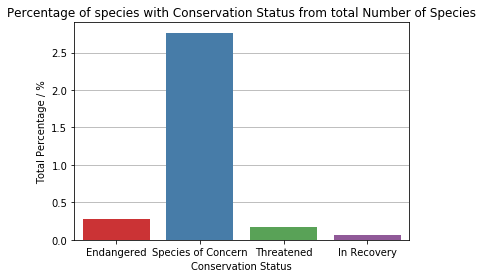

In [101]:
plt.title('Percentage of species with Conservation Status from total Number of Species')
plt.grid(True, zorder=1)
sns.barplot(data=cat_status, x='Conservation Status', y='Total Percentage / %', estimator=np.sum, ci=None, zorder=2, palette="Set1");

About 2.8 % of all species in the parks are species of concern. 0.28 % of the species are endangered, 0.17 % are threatened and 0.07 % are in recovery. 96.7 % of the species have no conservation status. 3,3 % of all species are protected.

## Which species was observed the most/least often?

In [32]:
observ.groupby('Scientific Name').sum().sort_values(by='Observations', ascending=False).head()

,Observations
Scientific Name,
Holcus lanatus,1780
Castor canadensis,1725
Hypochaeris radicata,1720
Puma concolor,1711
Procyon lotor,1692


In [33]:
observ.groupby('Scientific Name').sum().sort_values(by='Observations').head()

,Observations
Scientific Name,
Grus americana,131
Canis rufus,137
Vermivora bachmanii,141
Noturus baileyi,143
Rana sierrae,144


In [34]:
species['Common Name'][species['Scientific Name']=='Grus americana']

173    Whooping Crane
Name: Common Name, dtype: object

Considering all National Parks together, the species "Holcus Ianatus" was observed the most often (1780 observations) whereas the species "Grus americana" (Whooping Crane) was observed the least often (173 observations).

# Conclusions and Further Research

The project was able to make several data visualizations and inferences about the various species in four of the National Parks that comprised this data set.

This project was also able to answer some of the questions first posed in the beginning:

- In which park were most observations made?
    - Most observations were made in Yellowstone National Park.
- Are certain types of species more likely to be endangered?
    - Mammals and Birds had the highest percentage of being in protection.
- How many species are protected?
    - 3.3 % of all species are protected.
- Are the differences between species and their conservation status significant?
    - While mammals and Birds did not have significant difference in conservation percentage, mammals and reptiles exhibited a statistically significant difference.
- Which species is most prevalent and which is least prevalent?
    - The plant "Holcus Ianatus" is most prevalent and the animal Whooping Crane is least prevalent.
    
    
This dataset only included observations from the last 7 days which prohibits analyze changes over time. It would be curious to see how the conservation status for various species changes over time. Another piece that is missing is the Area of each park, it can be assumed that Yellowstone National Park might be much larger than the other parks which would mean that it would exhibit more observations and greater biodiversity. Lastly, if precise locations were recorded, the spatial distribution of the species could also be observed and test if these observations are spatially clustered.